In [2]:
import os
os.getcwd()

'C:\\Users\\User\\Downloads\\PROJECT1\\Resume-Scorer-Job-Matcher\\notebooks'

In [3]:
import os
os.chdir("..")  #go up one level if you're inside /notebooks

In [4]:
os.listdir()

['.git',
 '.gitignore',
 'data',
 'notebooks',
 'README.md',
 'requirements.txt',
 'src']

In [5]:
df = pd.read_csv("data/resumes.csv")
df.head()

,name,job_title,experience_years,skills,education
0,Ali Khan,Data Scientist,2,Python; Pandas; Machine Learning; SQL,BS Computer Science
1,Sara Malik,ML Engineer,3,Python; TensorFlow; Keras; Deep Learning,MS AI
2,Ahmed Raza,Data Analyst,1,Excel; SQL; Data Visualization,BS Statistics
3,Zoya Tariq,Software Engineer,4,Java; Spring Boot; Microservices,BS Software Engineering
4,Hassan Noor,NLP Researcher,2,NLP; Transformers; HuggingFace; PyTorch,MS Data Science


## 📦 Step 0 – Load the Data

I'm starting by loading the resumes dataset using pandas. It includes columns like name, job title, experience, skills, and education.


In [6]:
# Import pandas to work with data
import pandas as pd

# Load my dataset
df = pd.read_csv("data/resumes.csv")  # path matches my project folder structure

# Peek at the first few rows
df.head()


,name,job_title,experience_years,skills,education
0,Ali Khan,Data Scientist,2,Python; Pandas; Machine Learning; SQL,BS Computer Science
1,Sara Malik,ML Engineer,3,Python; TensorFlow; Keras; Deep Learning,MS AI
2,Ahmed Raza,Data Analyst,1,Excel; SQL; Data Visualization,BS Statistics
3,Zoya Tariq,Software Engineer,4,Java; Spring Boot; Microservices,BS Software Engineering
4,Hassan Noor,NLP Researcher,2,NLP; Transformers; HuggingFace; PyTorch,MS Data Science


## 👀 Step 1 – Initial Data Preview

I'm checking the overall structure of the dataset and seeing if any values are missing or badly formatted.


In [7]:
# Check data structure and non-null values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              6 non-null      object
 1   job_title         6 non-null      object
 2   experience_years  6 non-null      int64 
 3   skills            6 non-null      object
 4   education         6 non-null      object
dtypes: int64(1), object(4)
memory usage: 372.0+ bytes


name                0
job_title           0
experience_years    0
skills              0
education           0
dtype: int64

## 🔍 Step 2 – Job Titles & Experience Overview

I want to understand how many types of job titles there are and how experience is distributed across the dataset.


In [8]:
# Count job titles
df['job_title'].value_counts()


job_title
Data Scientist       1
ML Engineer          1
Data Analyst         1
Software Engineer    1
NLP Researcher       1
Backend Developer    1
Name: count, dtype: int64

In [9]:
# Describe experience years
df['experience_years'].describe()


count    6.000000
mean     2.833333
std      1.471960
min      1.000000
25%      2.000000
50%      2.500000
75%      3.750000
max      5.000000
Name: experience_years, dtype: float64

## 🛠️ Step 3 – Top Skills Analysis

The `skills` column contains many skills in a single string separated by `;`. I'm going to split them and count how often each skill shows up.


In [10]:
from collections import Counter

all_skills = []

# Split and clean each skill entry
for skill_str in df['skills']:
    all_skills.extend([s.strip() for s in skill_str.split(';')])

# Count frequency of each skill
skill_counts = Counter(all_skills)

# Display top 10 skills
skill_counts.most_common(10)


[('Python', 2),
 ('SQL', 2),
 ('Pandas', 1),
 ('Machine Learning', 1),
 ('TensorFlow', 1),
 ('Keras', 1),
 ('Deep Learning', 1),
 ('Excel', 1),
 ('Data Visualization', 1),
 ('Java', 1)]

## 📊 Step 4 – Visualizing Top 10 Skills

To get a clearer view of the top skills, I'm creating a horizontal bar chart. This helps me quickly spot trends in the dataset.


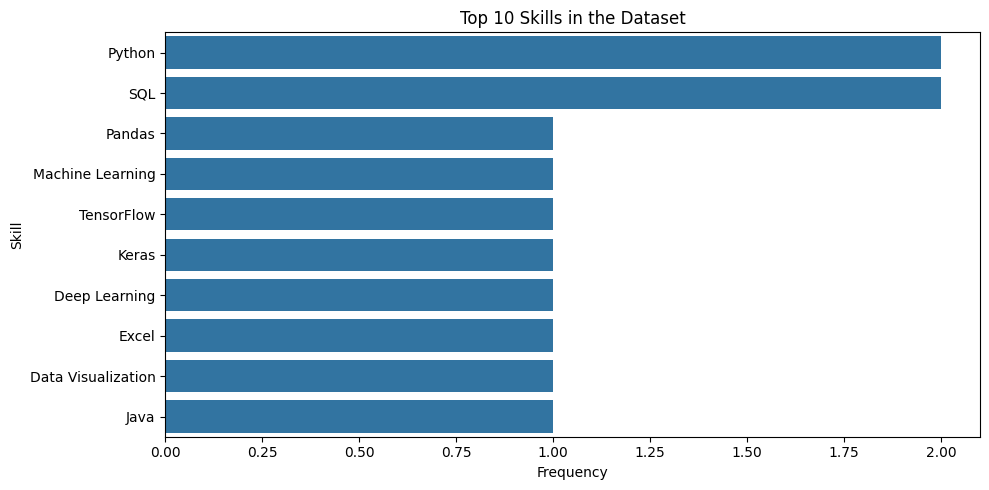

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top 10 skills
top_skills = skill_counts.most_common(10)
skills, counts = zip(*top_skills)

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(skills))
plt.title('Top 10 Skills in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()
